In [56]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import string
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [57]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')

# Amazon

In [58]:
path = ("C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\CSV Datasets\\Unit 2\\Unit 2 Lesson 2\\Naive Bayes Sentiment Analysis\\amazon_labelled.txt")
amazon = pd.read_csv(path, delimiter= '\t', header=None)
amazon.columns = ['review', 'sentiment']

In [59]:
amazon.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [60]:
amazon_positive = amazon[amazon['sentiment']==1]
amazon_negative = amazon[amazon['sentiment']==0]

In [61]:
positive_features = list(amazon_positive['review'].str.split())
positive_features = [item for sublist in positive_features for item in sublist]
positive_features = [''.join(c for c in s if c not in string.punctuation) for s in positive_features]
positive_features = [s for s in positive_features if s]
positive_features = list(map(lambda x:x.lower(),positive_features))
positive_features = Counter(positive_features)

negative_features = list(amazon_negative['review'].str.split())
negative_features = [item for sublist in negative_features for item in sublist]
negative_features = [''.join(c for c in s if c not in string.punctuation) for s in negative_features]
negative_features = [s for s in negative_features if s]
negative_features = list(map(lambda x:x.lower(),negative_features))
negative_features = Counter(negative_features)

In [62]:
print(positive_features)

Counter({'the': 237, 'and': 188, 'i': 154, 'is': 141, 'it': 128, 'this': 105, 'a': 105, 'great': 92, 'to': 86, 'phone': 86, 'my': 72, 'very': 69, 'for': 66, 'with': 65, 'good': 62, 'of': 49, 'works': 46, 'on': 44, 'have': 38, 'was': 36, 'in': 34, 'product': 33, 'that': 32, 'quality': 31, 'well': 31, 'headset': 31, 'sound': 27, 'excellent': 26, 'so': 26, 'price': 25, 'has': 24, 'its': 24, 'one': 23, 'are': 22, 'battery': 22, 'nice': 22, 'you': 21, 'use': 21, 'best': 21, 'had': 21, 'but': 21, 'recommend': 20, 'as': 20, 'all': 20, 'love': 20, 'ive': 19, 'than': 19, 'case': 18, 'like': 18, 'would': 17, 'from': 16, 'ear': 16, 'any': 15, 'not': 15, 'really': 15, 'comfortable': 14, 'easy': 14, 'your': 14, 'happy': 13, 'these': 13, 'new': 12, 'up': 12, 'fine': 12, 'bluetooth': 12, 'just': 12, 'been': 12, 'no': 12, 'better': 12, 'im': 12, 'am': 12, 'can': 11, 'car': 11, 'even': 11, 'time': 11, 'also': 11, 'be': 11, 'far': 10, 'clear': 10, 'device': 10, 'worked': 10, '2': 10, 'cell': 10, 'fits':

In [63]:
print(negative_features)

Counter({'the': 276, 'i': 162, 'it': 153, 'and': 122, 'a': 113, 'to': 110, 'is': 102, 'not': 102, 'this': 101, 'phone': 76, 'my': 71, 'of': 70, 'for': 55, 'in': 54, 'was': 54, 'that': 48, 'you': 47, 'with': 47, 'on': 45, 'have': 35, 'very': 34, 'had': 27, 'dont': 26, 'as': 25, 'but': 25, 'work': 25, 'if': 24, 'battery': 23, 'product': 22, 'all': 21, 'after': 21, 'me': 20, 'are': 20, 'use': 20, 'ear': 19, 'does': 19, 'its': 19, 'money': 18, 'your': 18, 'quality': 18, 'one': 17, 'from': 17, 'would': 17, 'out': 17, 'only': 17, 'so': 16, 'time': 16, 'headset': 16, 'at': 16, 'be': 16, 'or': 15, 'then': 15, 'do': 15, 'first': 15, 'poor': 15, 'service': 15, 'when': 15, 'no': 14, 'get': 14, 'up': 14, 'what': 14, 'waste': 14, 'sound': 14, 'doesnt': 14, 'buy': 14, 'bad': 14, 'worst': 14, 'could': 13, 'good': 13, 'too': 13, 'ever': 13, 'charger': 12, 'like': 12, 'off': 12, 'im': 12, 'will': 12, 'more': 11, 'calls': 11, '2': 11, 'about': 11, 'case': 11, 'really': 11, 'also': 11, 'same': 11, 'piece

### I chose features that seemed generic enough to apply to classifying positive and negative Amazon review sentiment across product categories, yet specific enough that Bayesian poisoning due to interpretation issues such as sarcasm would be limited.

In [64]:
positives = ['amazing', 'best','comfortable', 'easy', 'excellent', 'fabulous', 'fantastic', 'good', 'great', 'happy', 'impressed', 'love', 'loved', 'nice', 'perfectly', 'satisfied','works','worked']
negatives = ['bad', 'beware', 'crap', 'crappy', 'difficult', 'disappointed', 'disappointing', 'hate', 'hated', 'horrible', 'junk', 'not', 'problem', 'return', 'sucks', 'useless', 'waste', 'worst']
for positive in positives:
    amazon[str(positive)] = amazon.review.str.contains(str(positive),case=False)
for negative in negatives:
    amazon[str(negative)] = amazon.review.str.contains(str(negative),case=False)
amazon['sentiment'] = (amazon['sentiment'] == 1)

In [65]:
amazon.head()

,review,sentiment,amazing,best,comfortable,easy,excellent,fabulous,fantastic,good,...,hated,horrible,junk,not,problem,return,sucks,useless,waste,worst
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


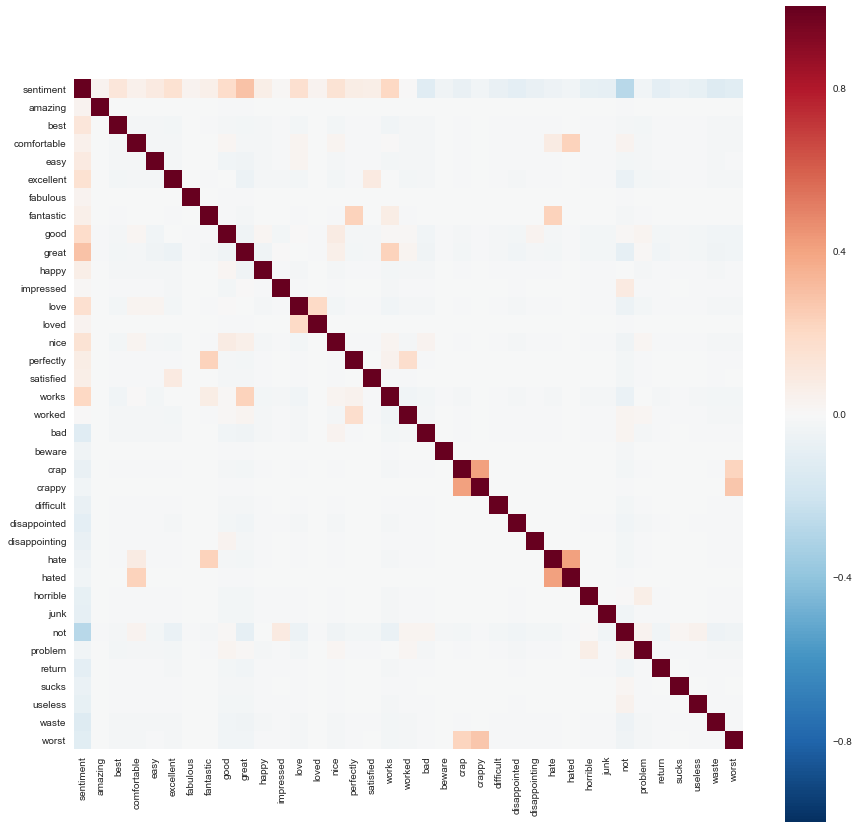

In [66]:
plt.figure(figsize=[15,15])
correlations_amazon = sns.heatmap(amazon.corr(),square=True)

### There are some inter-feature correlations, but none so significant that the independence assumption would force me to drop one or both of them. 

In [67]:
data_amazon = amazon.loc[:,'amazing':'worst']
target_amazon = amazon['sentiment']

bnb = BernoulliNB()
bnb.fit(data_amazon, target_amazon)
y_pred_amazon = bnb.predict(data_amazon)
print("Number of mislabeled points out of a total {} points : {}.".format(data_amazon.shape[0],(target_amazon != y_pred_amazon).sum()))

Number of mislabeled points out of a total 1000 points : 230.


## In-Sample Evaluation: Holdout Groups - Amazon

In [68]:
X = data_amazon
y = target_amazon

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
bnb.fit(X_train,y_train)
y_pred_class = bnb.predict(X_test)
print("Classification Accuracy (Percentage of Correct Predictions): {:.2%}.".format(metrics.accuracy_score(y_test,y_pred_class)))

Classification Accuracy (Percentage of Correct Predictions): 76.00%.


## In-Sample Evaluation: Repeated k-Fold Cross-Validation - Amazon

In [70]:
def iterative_xv(X,y):
    features = positives + negatives
    for i in range(5):
        print("Iteration {}".format(i+1))
        scores = []
        for feature in features:
            current_X = X.drop(feature, axis=1)
            print("Model Modification: Removed '{}'.".format(feature))
            score = cross_val_score(bnb, current_X, y, cv=10, scoring='accuracy').mean()
            scores.append(score)
            print("Out-of-Sample Accuracy (Averaged Across Folds): {:.2f}%.".format(score*100))
        index_to_drop = np.argmin(scores)
        feature_to_drop = features[index_to_drop]
        features.remove(feature_to_drop)
        X = X.drop(feature_to_drop, axis=1)
    return None

In [71]:
X = data_amazon
y = target_amazon
iterative_xv(X,y)

Iteration 1
Model Modification: Removed 'amazing'.
Out-of-Sample Accuracy (Averaged Across Folds): 76.50%.
Model Modification: Removed 'best'.
Out-of-Sample Accuracy (Averaged Across Folds): 75.00%.
Model Modification: Removed 'comfortable'.
Out-of-Sample Accuracy (Averaged Across Folds): 75.80%.
Model Modification: Removed 'easy'.
Out-of-Sample Accuracy (Averaged Across Folds): 75.50%.
Model Modification: Removed 'excellent'.
Out-of-Sample Accuracy (Averaged Across Folds): 74.30%.
Model Modification: Removed 'fabulous'.
Out-of-Sample Accuracy (Averaged Across Folds): 76.50%.
Model Modification: Removed 'fantastic'.
Out-of-Sample Accuracy (Averaged Across Folds): 76.40%.
Model Modification: Removed 'good'.
Out-of-Sample Accuracy (Averaged Across Folds): 72.70%.
Model Modification: Removed 'great'.
Out-of-Sample Accuracy (Averaged Across Folds): 70.40%.
Model Modification: Removed 'happy'.
Out-of-Sample Accuracy (Averaged Across Folds): 75.60%.
Model Modification: Removed 'impressed'.
O

# Yelp

In [72]:
new_path = 'C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\CSV Datasets\\Unit 2\\Unit 2 Lesson 2\\Naive Bayes Sentiment Analysis\\yelp_labelled.txt'
yelp = pd.read_csv(new_path, delimiter= '\t', header=None)
yelp.columns = ['review', 'sentiment']

In [73]:
yelp.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [74]:
for positive in positives:
    yelp[str(positive)] = yelp.review.str.contains(str(positive),case=False)
for negative in negatives:
    yelp[str(negative)] = yelp.review.str.contains(str(negative),case=False)
yelp['sentiment'] = (yelp['sentiment'] == 1)

In [75]:
data_yelp = yelp.loc[:,'amazing':'worst']
target_yelp = yelp['sentiment']

bnb = BernoulliNB()
bnb.fit(data_yelp, target_yelp)
y_pred_yelp = bnb.predict(data_yelp)
print("Number of mislabeled points out of a total {} points : {}.".format(data_yelp.shape[0],(target_yelp != y_pred_yelp).sum()))

Number of mislabeled points out of a total 1000 points : 283.


In [76]:
yelp.head()

,review,sentiment,amazing,best,comfortable,easy,excellent,fabulous,fantastic,good,...,hated,horrible,junk,not,problem,return,sucks,useless,waste,worst
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


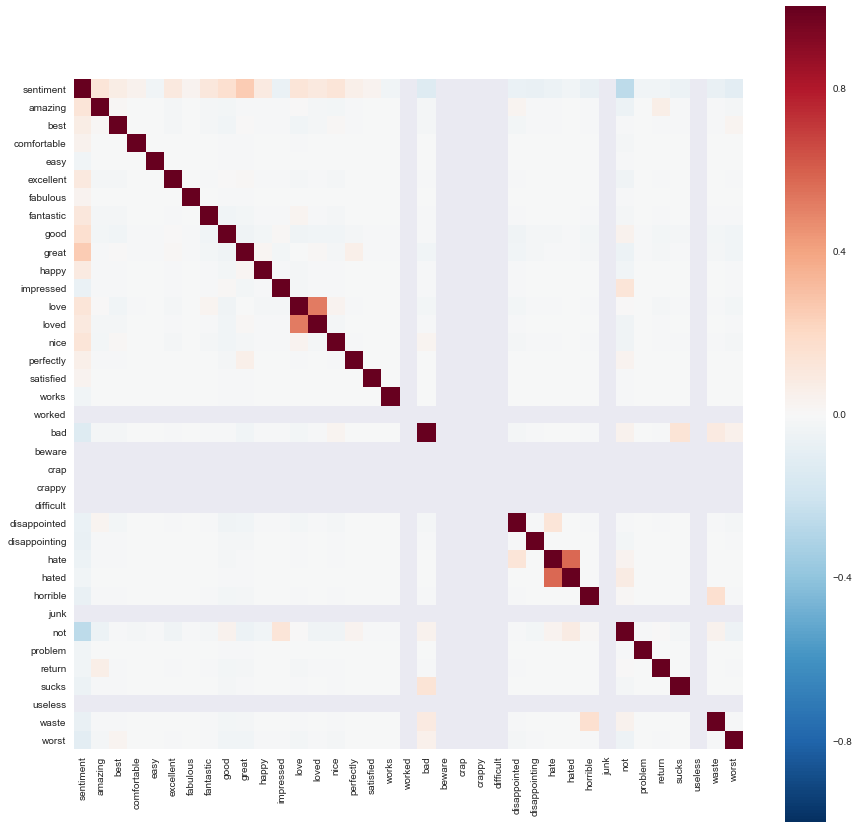

In [77]:
plt.figure(figsize=[15,15])
correlations_yelp = sns.heatmap(yelp.corr(),square=True)

### Some of the features from the first context don't translate well here: 'bad','beware','crap','crappy', 'difficult', 'junk', and 'useless'.

## In-Sample Evaluation: Holdout Groups - Yelp

In [78]:
X = data_yelp
y = target_yelp

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
bnb.fit(X_train,y_train)
y_pred_class = bnb.predict(X_test)
print("Classification Accuracy (Percentage of Correct Predictions): {:.2%}.".format(metrics.accuracy_score(y_test,y_pred_class)))

Classification Accuracy (Percentage of Correct Predictions): 65.60%.


## In-Sample Evaluation:  Cross-Validation - Yelp

In [80]:
X = data_yelp
y = target_yelp
iterative_xv(X,y)

Iteration 1
Model Modification: Removed 'amazing'.
Out-of-Sample Accuracy (Averaged Across Folds): 69.70%.
Model Modification: Removed 'best'.
Out-of-Sample Accuracy (Averaged Across Folds): 70.60%.
Model Modification: Removed 'comfortable'.
Out-of-Sample Accuracy (Averaged Across Folds): 71.30%.
Model Modification: Removed 'easy'.
Out-of-Sample Accuracy (Averaged Across Folds): 71.50%.
Model Modification: Removed 'excellent'.
Out-of-Sample Accuracy (Averaged Across Folds): 70.70%.
Model Modification: Removed 'fabulous'.
Out-of-Sample Accuracy (Averaged Across Folds): 71.50%.
Model Modification: Removed 'fantastic'.
Out-of-Sample Accuracy (Averaged Across Folds): 70.30%.
Model Modification: Removed 'good'.
Out-of-Sample Accuracy (Averaged Across Folds): 66.20%.
Model Modification: Removed 'great'.
Out-of-Sample Accuracy (Averaged Across Folds): 63.90%.
Model Modification: Removed 'happy'.
Out-of-Sample Accuracy (Averaged Across Folds): 70.80%.
Model Modification: Removed 'impressed'.
O